## Using retrieved resting-state hemodynamic response function for BOLD simulation

We have showed a comparision between BOLD simulations obtained through the Balloon-Windkessel model (legacy method) v/s using the retrieved rsHRF (rsHRF method). The experimentation shows a better correlation of the simulated functional connectivity (FC) matrix with the empirical FC matrix, for the rsHRF method.

- For more details regarding the experimentation and how to reproduce it, visit [here](https://github.com/AmoghJohri/TVB-Tests/blob/master/REPORT.md)
- For more details regarding retrieving the rsHRF, visit [here](https://bids-apps.neuroimaging.io/rsHRF/)

In [1]:
# importing libraries
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data
Ellaborate information about the dataset can be found [here](https://github.com/AmoghJohri/TVB-Tests/blob/master/REPORT.md). <br>
For our comparision we utilize the `PCorr.txt` file associated with participant. This stores the Pearsons' Correlation Value for the Empirical FC matrix vs Simulated FC matrix (for a range of *G - Global Coupling* values.

In [3]:
# subjects under analysis
subjects = os.listdir("./Output_filtered/")
print("Control Group Subjects: ")
for each in subjects:
    if "CON" in each:
        print(each, end = " ")
print("\n\nPatients: ")
for each in subjects:
    if "PAT" in each:
        print(each, end = " ")
print("\n\nTotal Number Of Participants Under Analysis: ", len(subjects))

Control Group Subjects: 
CON06 CON10 CON01 CON02 CON05 CON03 CON11 CON08 CON09 CON04 CON07 

Patients: 
PAT10 PAT19 PAT20 PAT23 PAT01 PAT11 PAT02 PAT06 PAT25 PAT05 PAT03 PAT22 PAT15 PAT17 PAT07 PAT16 PAT14 PAT13 PAT24 PAT08 

Total Number Of Participants Under Analysis:  31


In [4]:
# to get the path for the required result directory
def get_path(estimation, subject):
    return "./Output_filtered/" + subject + "/Output_" + estimation + "/"

In [5]:
# range of values of G over which the parameter-space exploration was performed
G = sorted([(i/10) + 0.01 for i in range(0, 32, 2)], reverse=True)
for each in G:
    print(str(each)[:4], end= " ")

3.01 2.80 2.61 2.40 2.21 2.01 1.81 1.61 1.41 1.21 1.01 0.81 0.61 0.41 0.21 0.01 

### Single Subject Demonstration
Here, we have used the rsHRF method. This is to show how the empirical FC vs simulated FC correlation values behave with respect to different values of G. The retrieved rsHRF has been obtained through the canonical-2DD estimation strategy.

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


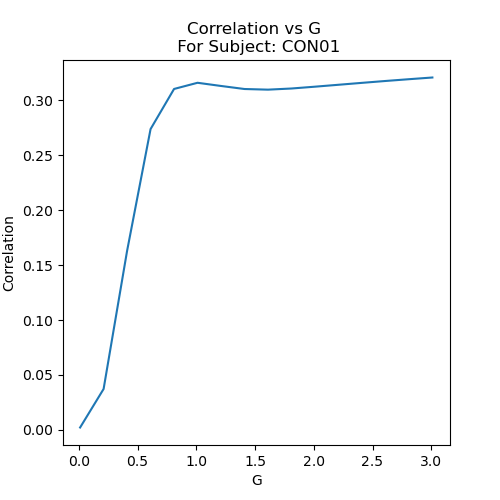

In [6]:
# getting the correlation vs G plot for a single subject
%pylab nbagg
plt.rcParams['figure.figsize'] = [5, 5]
temp = np.loadtxt(get_path("canon2dd", "CON01")+"PCorr.txt",delimiter="\n")
plt.plot(G, temp)
plt.xlabel("G")
plt.ylabel("Correlation")
plt.title("Correlation vs G \n For Subject: CON01")
plt.show()

### Analysis
For the comparision, the highest correlation value for each subject (over the entire range of G values) has been used.
There are 4 different estimation strategies:
- legacy method (using Balloon-Windkessel)
- rsHRF
    - canon2dd
    - fourier basis set
    - gamma fbasis set
    
For the final comparision, the best value obtained from rsHRF method (over the 3 different estimation strategy used) is considered.

In [7]:
# getting the max for each estimation stratergy
CON      = [] # control group patricipants
PAT      = [] # patients
# max-correlation values for each estimation strategy
# arr[0] corresponds to Control group participants (CON)
# arr[1] corresponds to Patient group participants (PAT)
CANON    = [[], []]
FOURIER  = [[], []]
GAMMA    = [[], []]
LEGACY   = [[], []]
for each in subjects:
    if "CON" in each:
        CANON[0].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        FOURIER[0].append(np.max(np.loadtxt(get_path("fourier", each)+"PCorr.txt",delimiter="\n")))
        GAMMA[0].append(np.max(np.loadtxt(get_path("gamma", each)+"PCorr.txt",delimiter="\n")))
        LEGACY[0].append(np.max(np.loadtxt(get_path("legacy", each)+"PCorr.txt",delimiter="\n")))
        CON.append(each)
    elif "PAT" in each:
        CANON[1].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        FOURIER[1].append(np.max(np.loadtxt(get_path("fourier", each)+"PCorr.txt",delimiter="\n")))
        GAMMA[1].append(np.max(np.loadtxt(get_path("gamma", each)+"PCorr.txt",delimiter="\n")))
        LEGACY[1].append(np.max(np.loadtxt(get_path("legacy", each)+"PCorr.txt",delimiter="\n")))
        PAT.append(each)

In [8]:
# converting to numpy arrays
for i in range(0, 2):
    CANON[i]   = np.array(CANON[i])
    FOURIER[i] = np.array(FOURIER[i])
    GAMMA[i]   = np.array(GAMMA[i])
    LEGACY[i]  = np.array(LEGACY[i])
CON     = np.array(CON)
PAT     = np.array(PAT)
CANON   = np.array(CANON)
FOURIER = np.array(FOURIER)
GAMMA   = np.array(GAMMA)
LEGACY  = np.array(LEGACY)

In [9]:
# sorting the correlation values
indsCON = CANON[0].argsort()
sortedCanonCON = CANON[0][indsCON[::]]
sortedLegacyCON = LEGACY[0][indsCON[::]]

In [10]:
# getting average correlation
legacy = np.concatenate((LEGACY[0], LEGACY[1]))
rsHRF = []
for i in range(len(CANON[0])):
    rsHRF.append([np.max([CANON[0][i], FOURIER[0][i], GAMMA[0][i]])])
for i in range(len(CANON[1])):
    rsHRF.append([np.max([CANON[1][i], FOURIER[1][i], GAMMA[1][i]])])
rsHRF = np.array(rsHRF).reshape(-1)
print("Average Correlation Values: \n")
print("Across All Participants")
print("Legacy: ", sum(legacy)/len(legacy))
print("rsHRF: ", sum(rsHRF)/len(rsHRF))
print("\nAcross Control Subjects")
print("Legacy: ", sum(legacy[:11])/len(legacy[:11]))
print("rsHRF: ", sum(rsHRF[:11])/len(rsHRF[:11]))
print("\nAcross Patients")
print("Legacy: ", sum(legacy[11:])/len(legacy[11:]))
print("rsHRF: ", sum(rsHRF[11:])/len(rsHRF[11:]))

Average Correlation Values: 

Across All Participants
Legacy:  0.2935634107158824
rsHRF:  0.31651974926474213

Across Control Subjects
Legacy:  0.2703027680443932
rsHRF:  0.2976473010796285

Across Patients
Legacy:  0.30635676418520147
rsHRF:  0.3268995957665548


The above values show that the rsHRF method provides ~0.024 increase (on average) in the correlation of empirical FC vs simulated FC.

### Comparitive Analysis
In the next sections we will show the comparision between the correlation values of rsHRF method vs the legacy method.

In [11]:
# sorting the correlation values
indsrsHRF = rsHRF.argsort()
sortedLegacy = legacy[indsrsHRF]
sortedrsHRF = rsHRF[indsrsHRF]

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


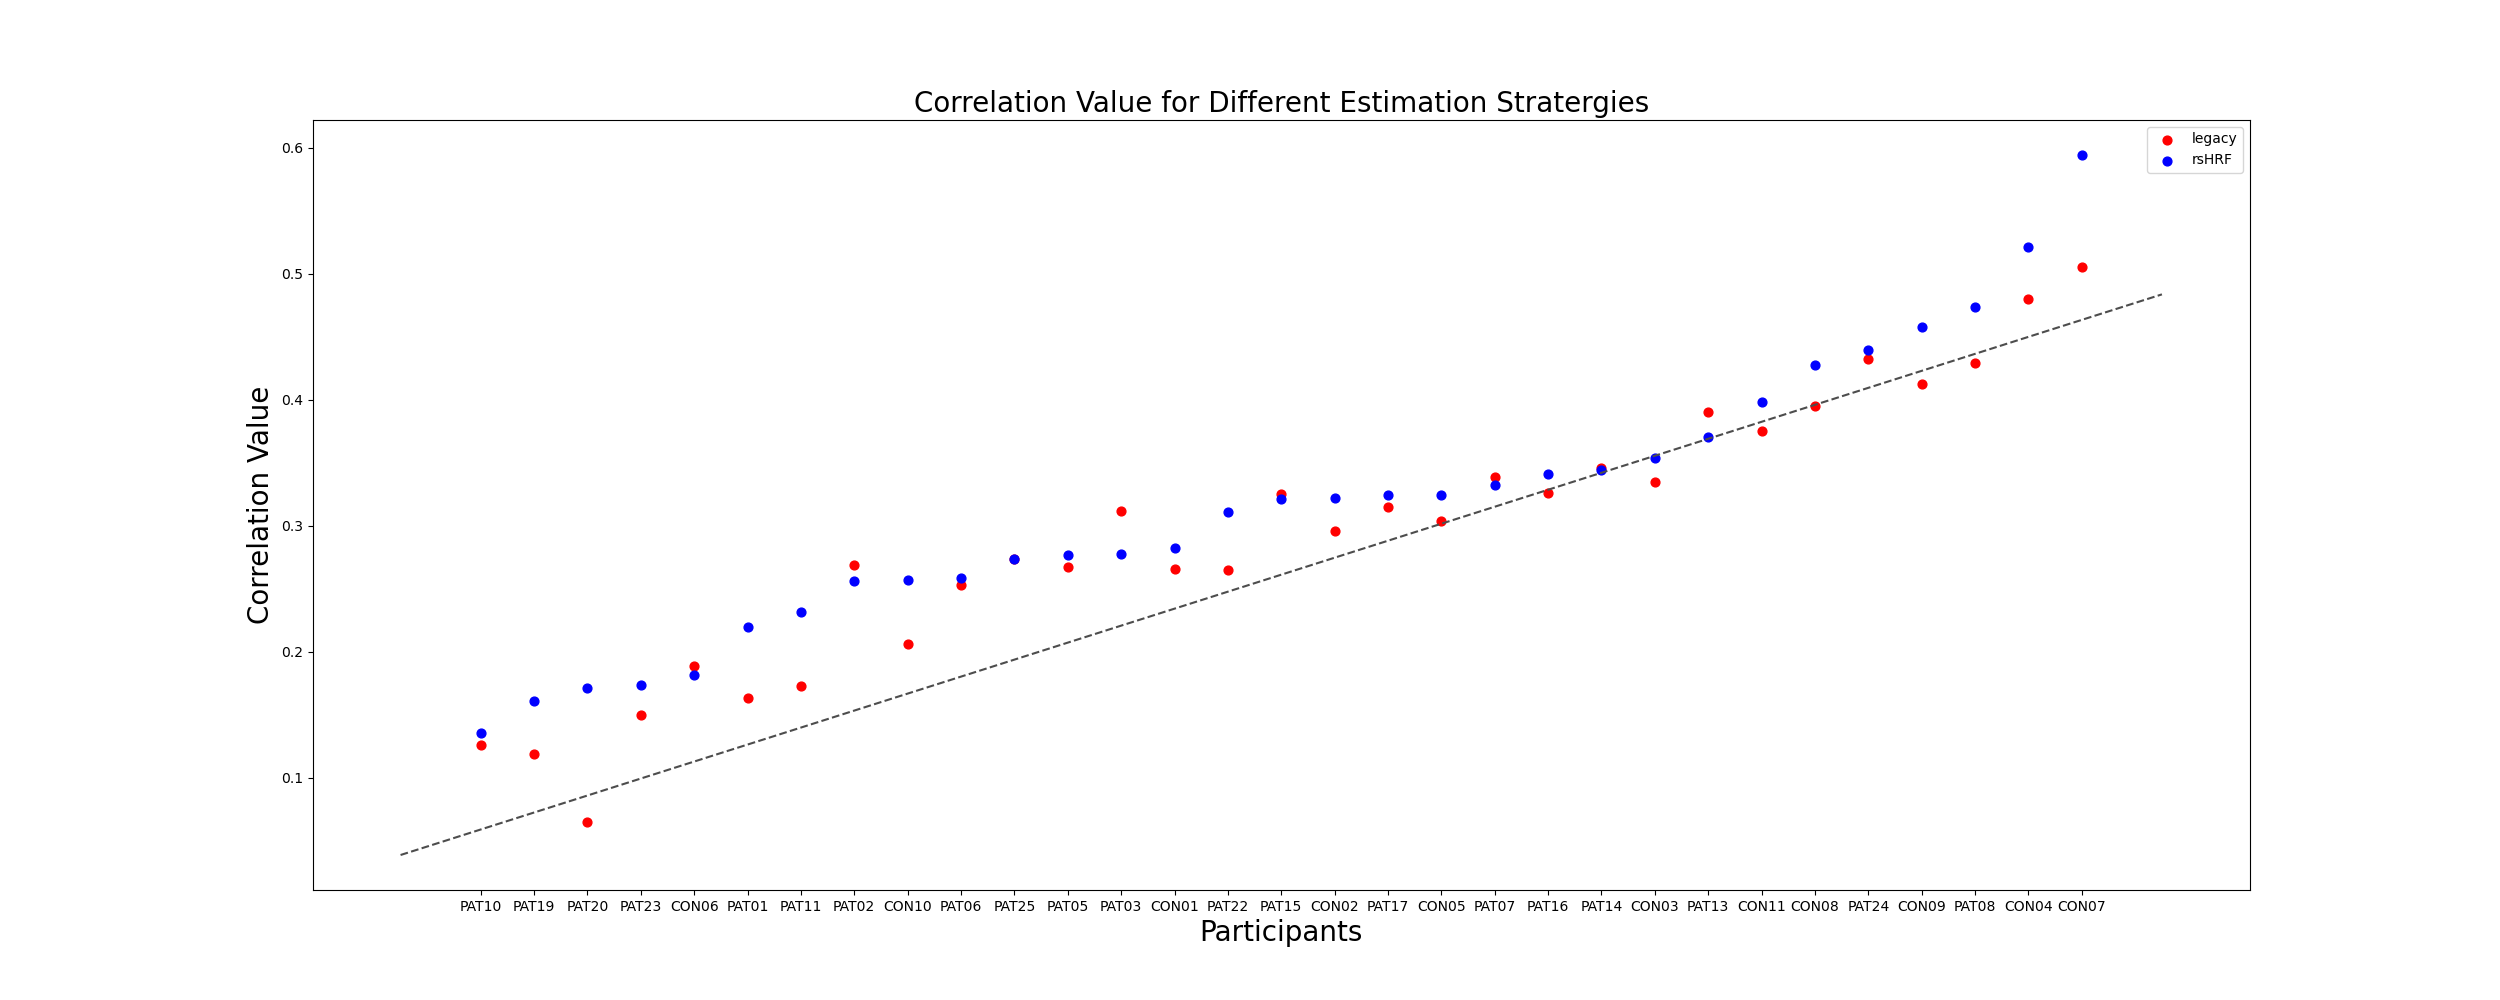

In [12]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [25, 10]
plt.scatter(subjects, sortedLegacy, label="legacy", color="red", s=40)
plt.scatter(subjects, sortedrsHRF, label="rsHRF", color="blue", s=40)
ylim = [0, 0]
ylim[0] = plt.gca().get_ylim()[0]
ylim[1] = plt.gca().get_ylim()[1] - 0.137
plt.plot(plt.gca().get_xlim(), ylim, ls="--", c=".3")
plt.xlabel("Participants", size=20)
plt.ylabel("Correlation Value", size=20)
plt.title("Correlation Value for Different Estimation Stratergies", size=20)
plt.legend(prop={'size': 10})
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


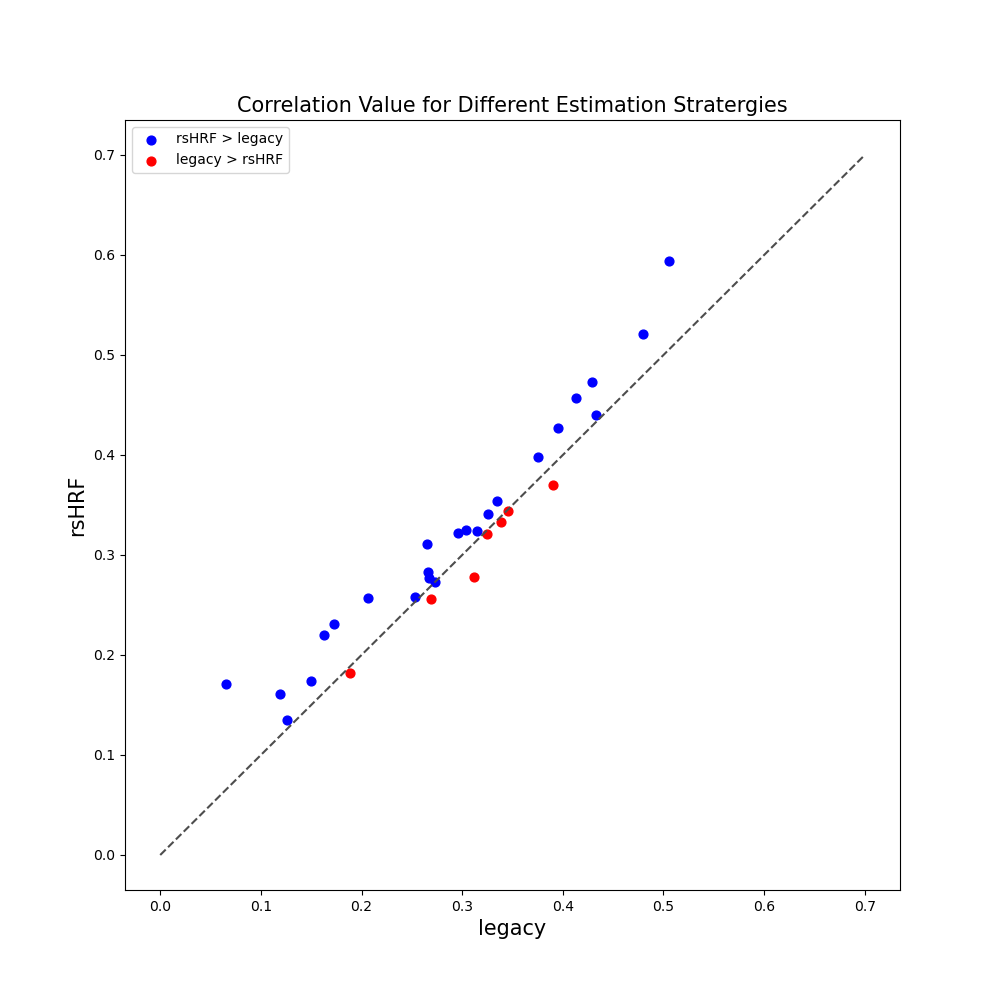

In [13]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [10, 10]
temp1 = [[], []]
temp2 = [[], []]
for i in range(len(sortedLegacy)):
    if sortedLegacy[i] > sortedrsHRF[i]:
        temp2[0].append(sortedrsHRF[i])
        temp2[1].append(sortedLegacy[i])
    else:
        temp1[0].append(sortedrsHRF[i])
        temp1[1].append(sortedLegacy[i])
plt.scatter(temp1[1], temp1[0], color="blue", label="rsHRF > legacy", s=40)
plt.scatter(temp2[1], temp2[0], color="red", label="legacy > rsHRF", s=40)
xlim = (0.0, 0.7)
ylim = (0.0, 0.7)
plt.plot(xlim, ylim, ls="--", c=".3")
plt.xlabel("legacy", size=15)
plt.ylabel("rsHRF", size=15)
plt.title("Correlation Value for Different Estimation Stratergies", size=15)
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


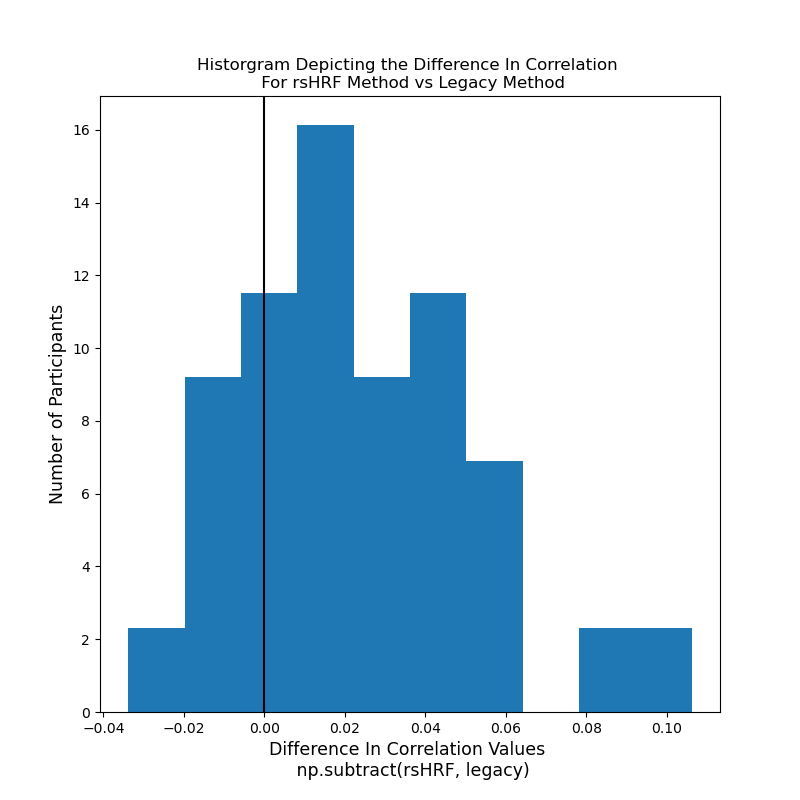

In [14]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [8, 8]
diff = np.subtract(rsHRF, legacy)
plt.hist(diff, bins=10, density=True)
plt.axvline(x=0, ymin=0.0, ymax=9, color="black")
plt.xlabel("Difference In Correlation Values \n np.subtract(rsHRF, legacy)", size=12.5)
plt.ylabel("Number of Participants", size=12.5)
plt.title("Historgram Depicting the Difference In Correlation \n For rsHRF Method vs Legacy Method")
plt.show()

### Histogram
All the points to the right of the `x=0` line represent the region where the correlation obtained through the rsHRF method was greater, and vice e versa. <br>
For the rsHRF method:
- A higher correlation value was obtained for more number of participants.
- The higher values went upto ~0.11.
- For participants where the correlation dropped, it dropped only to around ~0.03.

### Analyzing Optimal G (and Corresponding J_i Values)

In [15]:
PCorr = []
J_i   = []
G     = G
estimation = ['canon2dd', 'fourier', 'gamma']
for each in subjects:
    temp = []
    for e in estimation:
        temp.append(np.max(np.loadtxt(get_path(e, each)+"PCorr.txt",delimiter="\n")))
    PCorr.append(np.loadtxt(get_path(estimation[np.argmax(temp)],each)+"PCorr.txt", delimiter="\n"))
    J_i.append(np.median(np.loadtxt(get_path(estimation[np.argmax(temp)], each)+"J_i.txt"), axis=0))
PCorr = np.array(PCorr)
J_i = np.array(J_i)
G = np.array(G)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


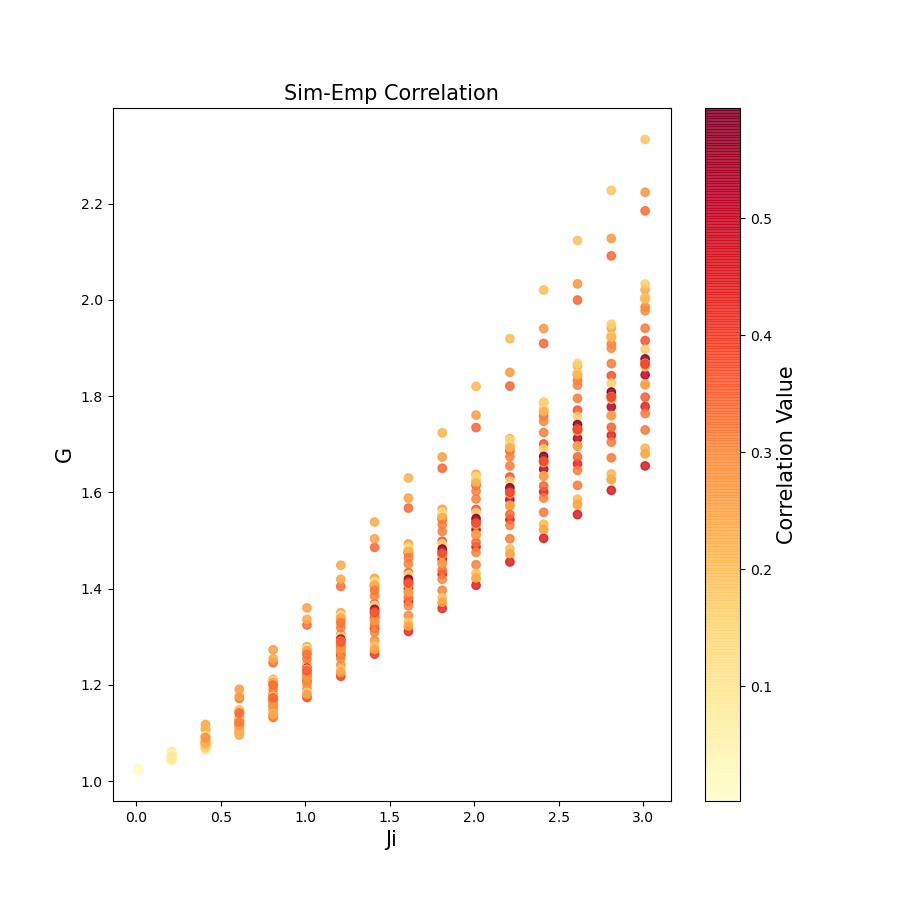

In [16]:
# obtaining the G and J_i and correlation value triplets, for each run
# for the J_i values, a median has been taken over all the brain regions
%pylab nbagg
max_ = 0.0
min_ = 1.0
cmap = plt.get_cmap("YlOrRd")
plt.rcParams['figure.figsize'] = [9, 9]
for i in range(PCorr.shape[0]):
    if np.max(PCorr[i]) > max_:
        max_ = np.max(PCorr[i])
    if np.min(PCorr[i]) < min_:
        min_ = np.min(PCorr[i])
for i in range(PCorr.shape[0]):
    plt.scatter(G, J_i[i], c=PCorr[i], cmap=cmap, vmax=max_, vmin=min_, alpha=0.85)
plt.ylabel("G", size=15)
plt.xlabel("Ji", size=15)
plt.title("Sim-Emp Correlation", size=15)
plt.colorbar().set_label("Correlation Value", size=15)
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


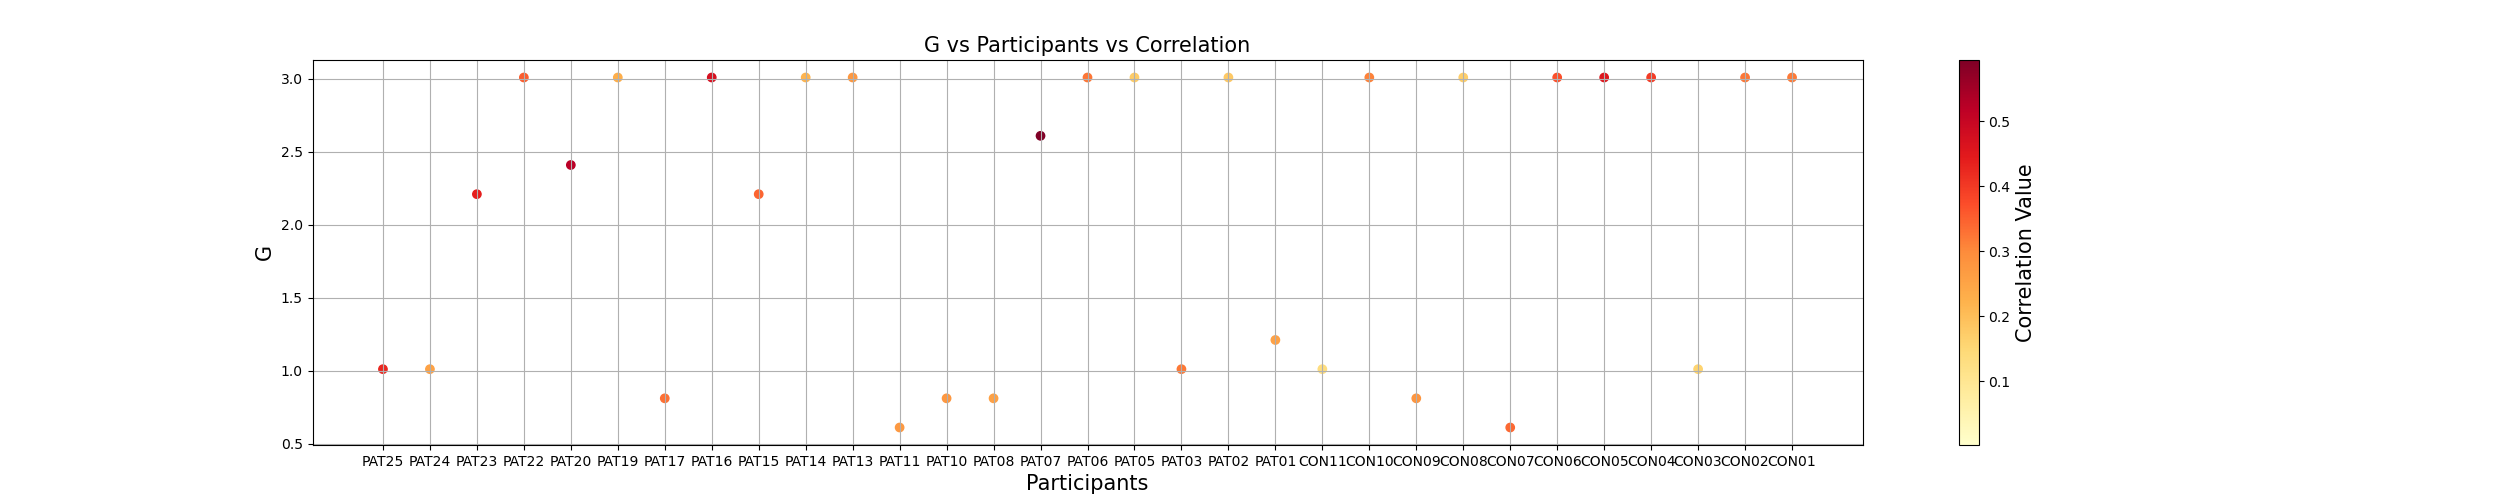

In [17]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [25, 5]
subjects = np.array(subjects)
PCorr = np.array(PCorr)
subIds = subjects.argsort()
subjects = subjects[subIds[::-1]]
PCorr = PCorr[subIds[::-1]]
plt.grid()
G_max = []
for i in range(PCorr.shape[0]):
    G_max.append((3.0 - 0.2*np.argmax(PCorr[i])) + 0.01)
plt.scatter(subjects, G_max, c=np.max(PCorr, axis=1), cmap=cmap, vmax=max_, vmin=min_)
plt.ylabel("G", size=15)
plt.xlabel("Participants", size=15)
plt.title("G vs Participants vs Correlation", size=15)
plt.colorbar().set_label("Correlation Value", size=15)
plt.show()